In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('kddcup/kdd_train.csv')

In [4]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

0 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['protocol_type', 'service', 'flag', 'labels'] 



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [6]:
data['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [7]:
data['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [8]:
data['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [10]:
data['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [11]:
# changing attack labels to their respective attack class
def change_label(df):
  df.labels.replace(['back','land','neptune','pod','smurf','teardrop'],'Dos',inplace=True)
  df.labels.replace(['guess_passwd','imap','ftp_write','multihop','phf','spy','warezclient','warezmaster'],'R2L',inplace=True)      
  df.labels.replace(['ipsweep','nmap','portsweep','satan'],'Probe',inplace=True)
  df.labels.replace(['buffer_overflow','loadmodule','perl','rootkit'],'U2R',inplace=True)

In [12]:
change_label(data)

In [13]:
# distribution of attack classes
data['labels'].value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: labels, dtype: int64

In [15]:
#print(data.info())
data = pd.concat([
    data[data.labels == 'normal'].sample(n=10_000),
    data[data.labels == 'Dos'].sample(n=10_000),
    data[data.labels == 'Probe'].sample(n=5_000),
    data[data.labels == 'R2L'],
    data[data.labels == 'U2R']
])
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26047 entries, 14247 to 120498
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     26047 non-null  int64  
 1   protocol_type                26047 non-null  object 
 2   service                      26047 non-null  object 
 3   flag                         26047 non-null  object 
 4   src_bytes                    26047 non-null  int64  
 5   dst_bytes                    26047 non-null  int64  
 6   land                         26047 non-null  int64  
 7   wrong_fragment               26047 non-null  int64  
 8   urgent                       26047 non-null  int64  
 9   hot                          26047 non-null  int64  
 10  num_failed_logins            26047 non-null  int64  
 11  logged_in                    26047 non-null  int64  
 12  num_compromised              26047 non-null  int64  
 13  root_shell 

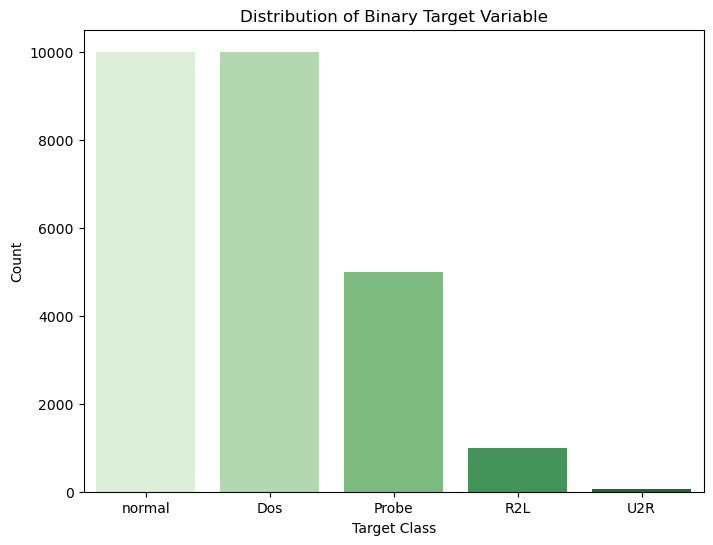

In [17]:
# Plotting the distribution of the binary target variable y
plt.figure(figsize=(8, 6))
sns.countplot(x=data['labels'], palette='Greens')
plt.title('Distribution of Binary Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [18]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['labels']= label_encoder.fit_transform(data['labels'])
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['service']= label_encoder.fit_transform(data['service'])
data['flag']= label_encoder.fit_transform(data['flag'])

In [19]:
X = data.drop(["labels"],axis =1)
y = data["labels"]

# FS

In [20]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [21]:
selector = SelectPercentile(mutual_info_classif, percentile=25)
X_reduced = selector.fit_transform(X, y)
#X_reduced.shape

In [22]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate']

In [23]:
len(selected_columns)

10

In [24]:
df = data[['service',
         'flag',
         'src_bytes',
         'dst_bytes',
         'count',
         'same_srv_rate',
         'diff_srv_rate',
         'dst_host_srv_count',
         'dst_host_same_srv_rate',
         'dst_host_diff_srv_rate','labels']]

In [25]:
df.to_csv('kdd_processed.csv')

In [26]:
df = pd.read_csv('kdd_processed.csv')

In [27]:
del df['Unnamed: 0']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26047 entries, 0 to 26046
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   service                 26047 non-null  int64  
 1   flag                    26047 non-null  int64  
 2   src_bytes               26047 non-null  int64  
 3   dst_bytes               26047 non-null  int64  
 4   count                   26047 non-null  int64  
 5   same_srv_rate           26047 non-null  float64
 6   diff_srv_rate           26047 non-null  float64
 7   dst_host_srv_count      26047 non-null  int64  
 8   dst_host_same_srv_rate  26047 non-null  float64
 9   dst_host_diff_srv_rate  26047 non-null  float64
 10  labels                  26047 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.2 MB


In [29]:
df.columns

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'labels'],
      dtype='object')

In [30]:
X = df[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate']]
y = df["labels"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20837, 10), (20837,), (5210, 10), (5210,))

In [32]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [35]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [36]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [37]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [39]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [41]:
 storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [42]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [43]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [44]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier

estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [45]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [46]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [47]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.981,0.981,0.981,0.981
1,Softmax LR,0.730,0.937,0.730,0.820
2,RandomForest,0.995,0.995,0.995,0.995
3,HAT/DecisionTree,0.986,0.986,0.986,0.986
4,Majority Voting,0.991,0.991,0.991,0.991
5,Stacking Classifier,0.997,0.998,0.997,0.997


# Modelling

In [48]:
import joblib
filename = 'models/kddcup/model_org.sav'
joblib.dump(eclf1, filename)

['models/kddcup/model_org.sav']

# Graph

In [50]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

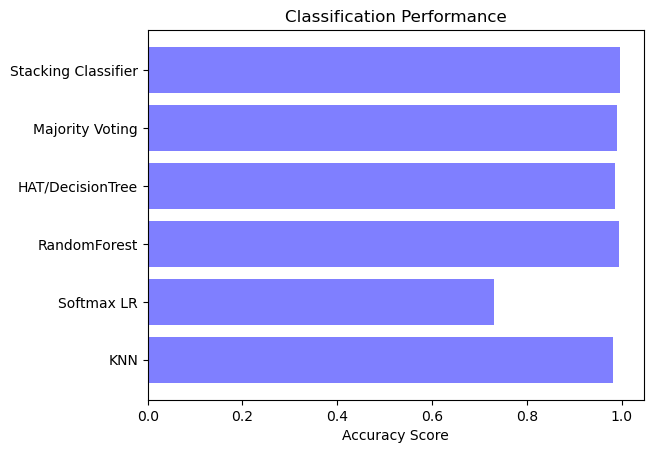

In [51]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

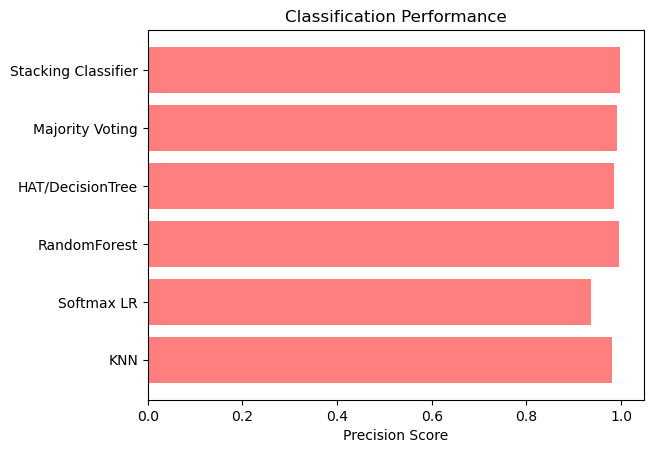

In [52]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

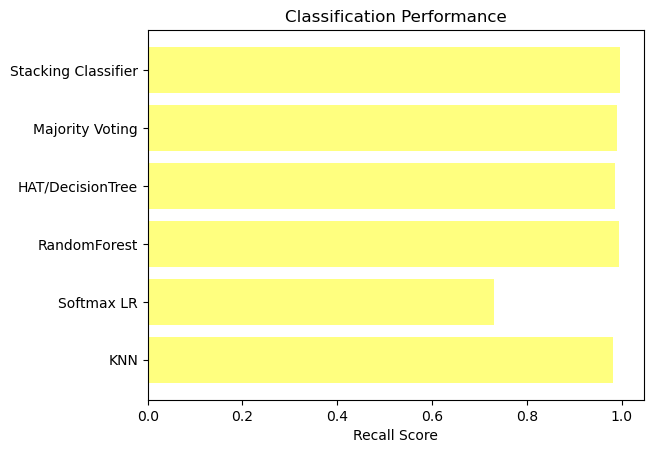

In [53]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

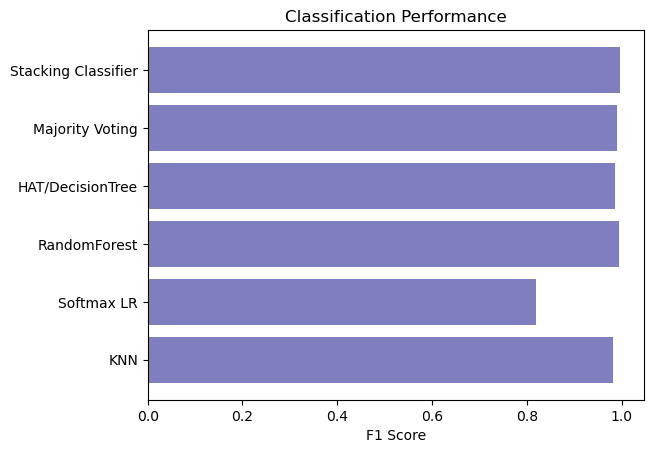

In [54]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Random UnderSampling

In [55]:
X = df[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate']]
y = df["labels"]

In [56]:
from imblearn.under_sampling import RandomUnderSampler

In [57]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((208, 10), (208,), (52, 10), (52,))

In [59]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [61]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [62]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [63]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [65]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [67]:
storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [68]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [69]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [70]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier

estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [71]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [72]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [73]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.846,0.851,0.846,0.848
1,Softmax LR,0.404,0.942,0.404,0.530
2,RandomForest,0.942,0.946,0.942,0.942
3,HAT/DecisionTree,0.865,0.887,0.865,0.867
4,Majority Voting,0.923,0.929,0.923,0.924
5,Stacking Classifier,0.981,0.983,0.981,0.981


In [74]:
import joblib
filename = 'models/kddcup/model_und.sav'
joblib.dump(eclf1, filename)

['models/kddcup/model_und.sav']

# Graph

In [75]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

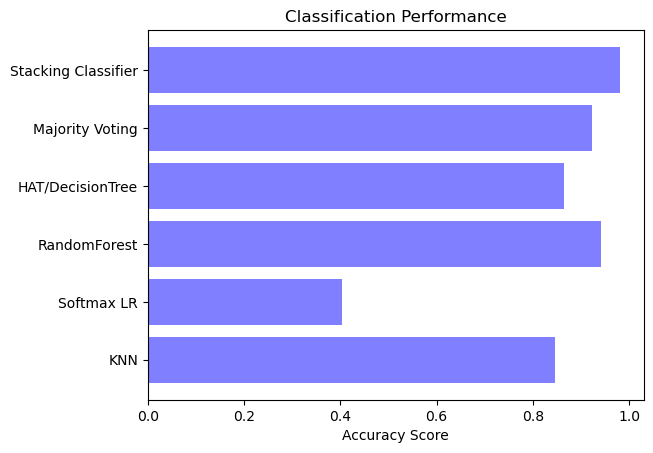

In [76]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

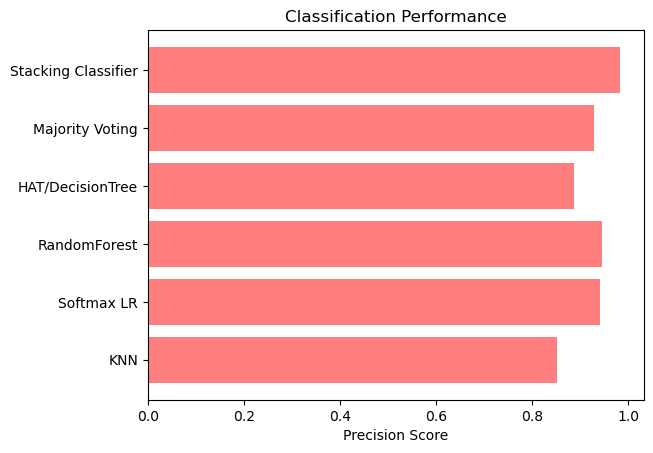

In [77]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

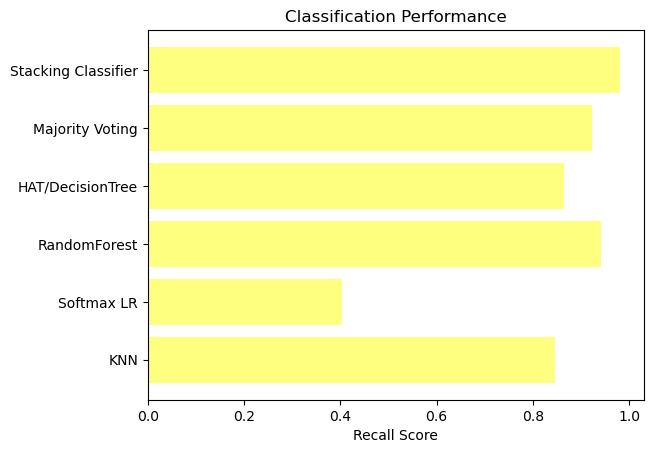

In [78]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

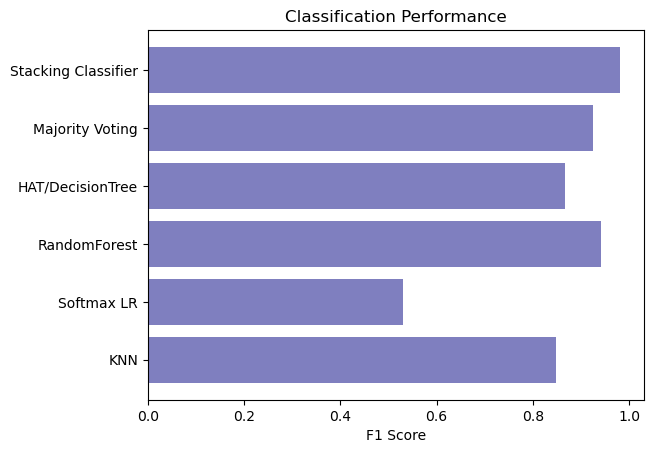

In [79]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Random OverSampling

In [80]:
X = df[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate']]
y = df["labels"]

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [82]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 10), (40000,), (10000, 10), (10000,))

In [84]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [86]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [87]:
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [88]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [89]:
rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [90]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [91]:
dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [92]:
storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [93]:
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [94]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [95]:
estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [96]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [97]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [98]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.989,0.989,0.989,0.989
1,Softmax LR,0.372,0.604,0.372,0.447
2,RandomForest,0.998,0.998,0.998,0.998
3,HAT/DecisionTree,0.994,0.994,0.994,0.994
4,Majority Voting,0.996,0.996,0.996,0.996
5,Stacking Classifier,0.999,0.999,0.999,0.999


# Graph

In [99]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

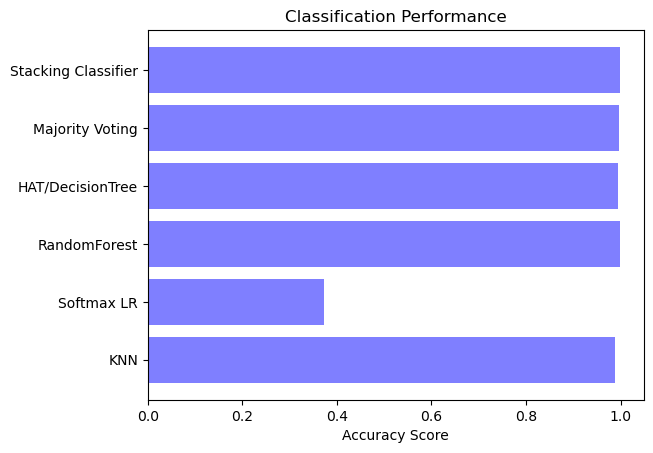

In [100]:
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

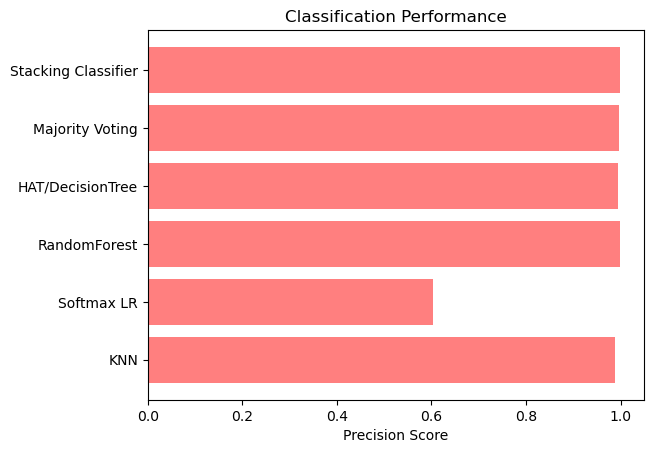

In [101]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

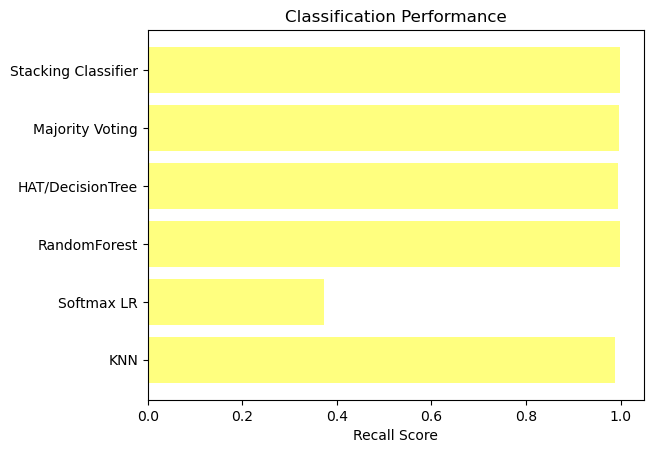

In [102]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

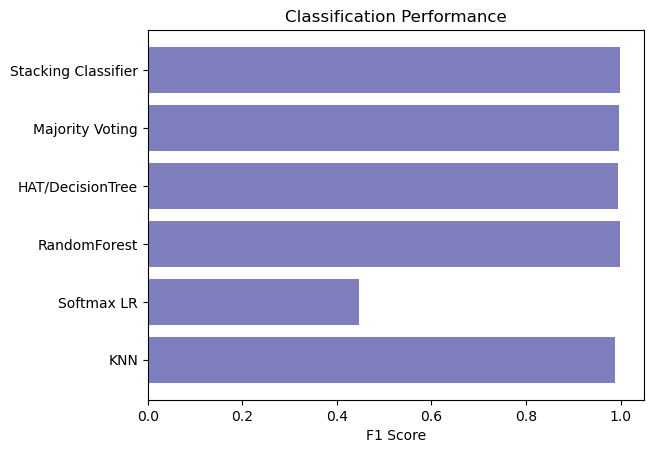

In [103]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Random Under/Over Sampler (Combine)

In [105]:
X = df[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate']]
y = df["labels"]

In [106]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)

In [107]:
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38927, 10), (38927,), (9732, 10), (9732,))

In [109]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [111]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [112]:
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [113]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [114]:
rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [115]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [116]:
dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [117]:
storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [118]:
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [119]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [120]:
estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=100, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [121]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [122]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [123]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.997,0.997,0.997,0.997
1,Softmax LR,0.386,0.584,0.386,0.463
2,RandomForest,0.999,0.999,0.999,0.999
3,HAT/DecisionTree,0.992,0.992,0.992,0.992
4,Majority Voting,0.998,0.998,0.998,0.998
5,Stacking Classifier,1.000,1.000,1.000,1.000


# Modelling

In [124]:
import joblib
filename = 'models/kddcup/model_com.sav'
joblib.dump(eclf1, filename)

['models/kddcup/model_com.sav']

# Graph

In [126]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

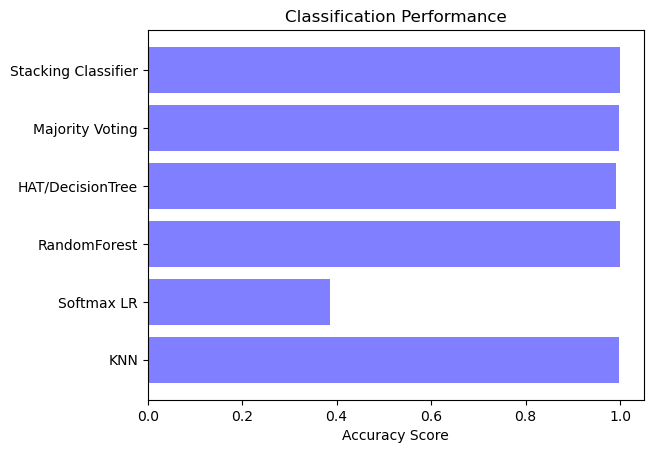

In [127]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

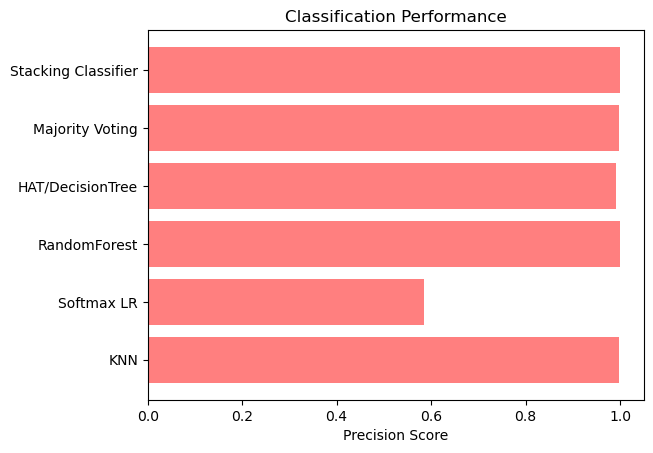

In [128]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

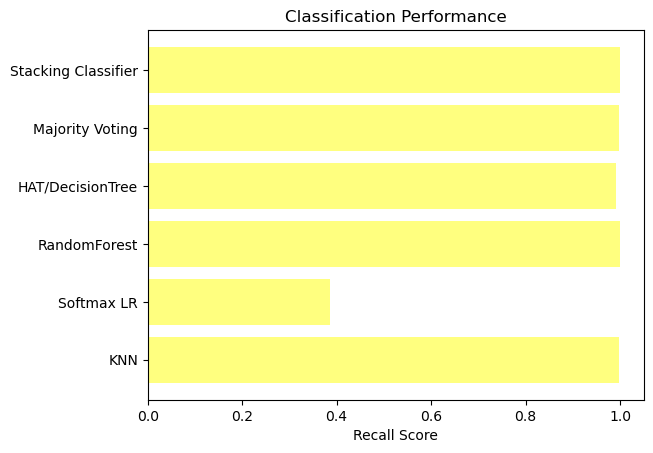

In [129]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

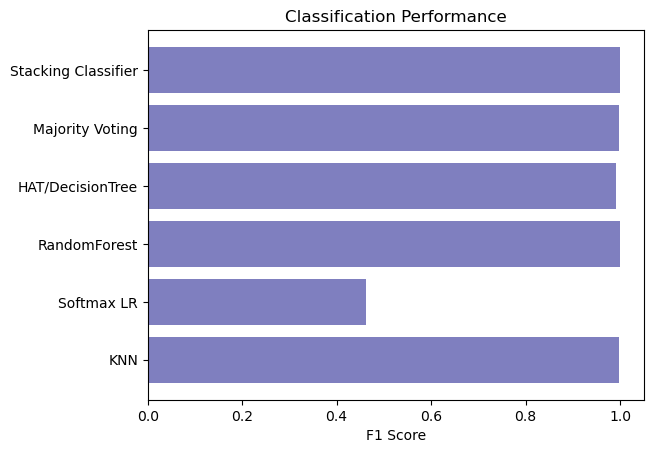

In [130]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()